<a href="https://colab.research.google.com/github/woong711/zzolab/blob/main/5_6%EC%A3%BC%EC%B0%A8_%EC%9E%87%ED%8B%B0%EC%A0%9C_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

해결하고자 하는 문제: 경기도의 교육청들 중에서 신규 발령이 많이 나는 지역이 어디일까?

신규발령 데이터를 찾을 수 없어서 상대적으로 신규일 확률이 높은 정교사 2정 자격증을 가진 선생님의 수로 대략적으로나마 유추해보고자 시도함.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import csv
data = csv.reader(open('school.csv', encoding = 'cp949'))
next(data)
local = []

for row in data:
  if row[1] not in local:
    local.append(row[1])
print(local)


['경기도가평교육지원청', '경기도고양교육지원청', '경기도광명교육지원청', '경기도광주하남교육지원청', '경기도구리남양주교육지원청', '경기도군포의왕교육지원청', '경기도김포교육지원청', '경기도동두천양주교육지원청', '경기도부천교육지원청', '경기도성남교육지원청', '경기도수원교육지원청', '경기도안산교육지원청', '경기도시흥교육지원청', '경기도안성교육지원청', '경기도안양과천교육지원청', '경기도양평교육지원청', '경기도여주교육지원청', '경기도연천교육지원청', '경기도용인교육지원청', '경기도의정부교육지원청', '경기도이천교육지원청', '경기도파주교육지원청', '경기도평택교육지원청', '경기도포천교육지원청', '경기도화성오산교육지원청']


In [3]:
data = csv.reader(open('school.csv', encoding = 'cp949'))
next(data)
propotion = []
sum_all = []
sum_2 = []

for i in range(len(local)):
  sum_all.append([])
  sum_2.append([])
  sum_all[i] = 0
  sum_2[i]=0

for row in data:
  for i in range(len(local)):
    if row[1] == local[i]:
      sum_2[i] = int(sum_2[i])+int(row[23])
      sum_all[i] = int(sum_all[i])+int(row[53])

  # if row[1] == local[0]:
  #   sum_2[0] = int(sum_2[0])+int(row[23])
  #   sum_all[0] = int(sum_all[0])+int(row[53])

for i in range(len(local)):
  propotion.append(sum_2[i]/sum_all[i]*100)
print(propotion)

[24.358974358974358, 11.0685899322932, 10.746812386156648, 14.792663476874004, 12.203687445127304, 9.277620396600566, 17.172188520765282, 29.231974921630094, 21.521103217718345, 14.19141914191419, 18.28793774319066, 14.245283018867925, 14.404703576678099, 26.140567200986435, 12.764830508474576, 5.949656750572083, 18.94273127753304, 35.467980295566505, 11.555766043097323, 36.04815864022663, 14.108352144469528, 22.58387581372058, 32.09655789003129, 32.11678832116788, 15.43372136687946]


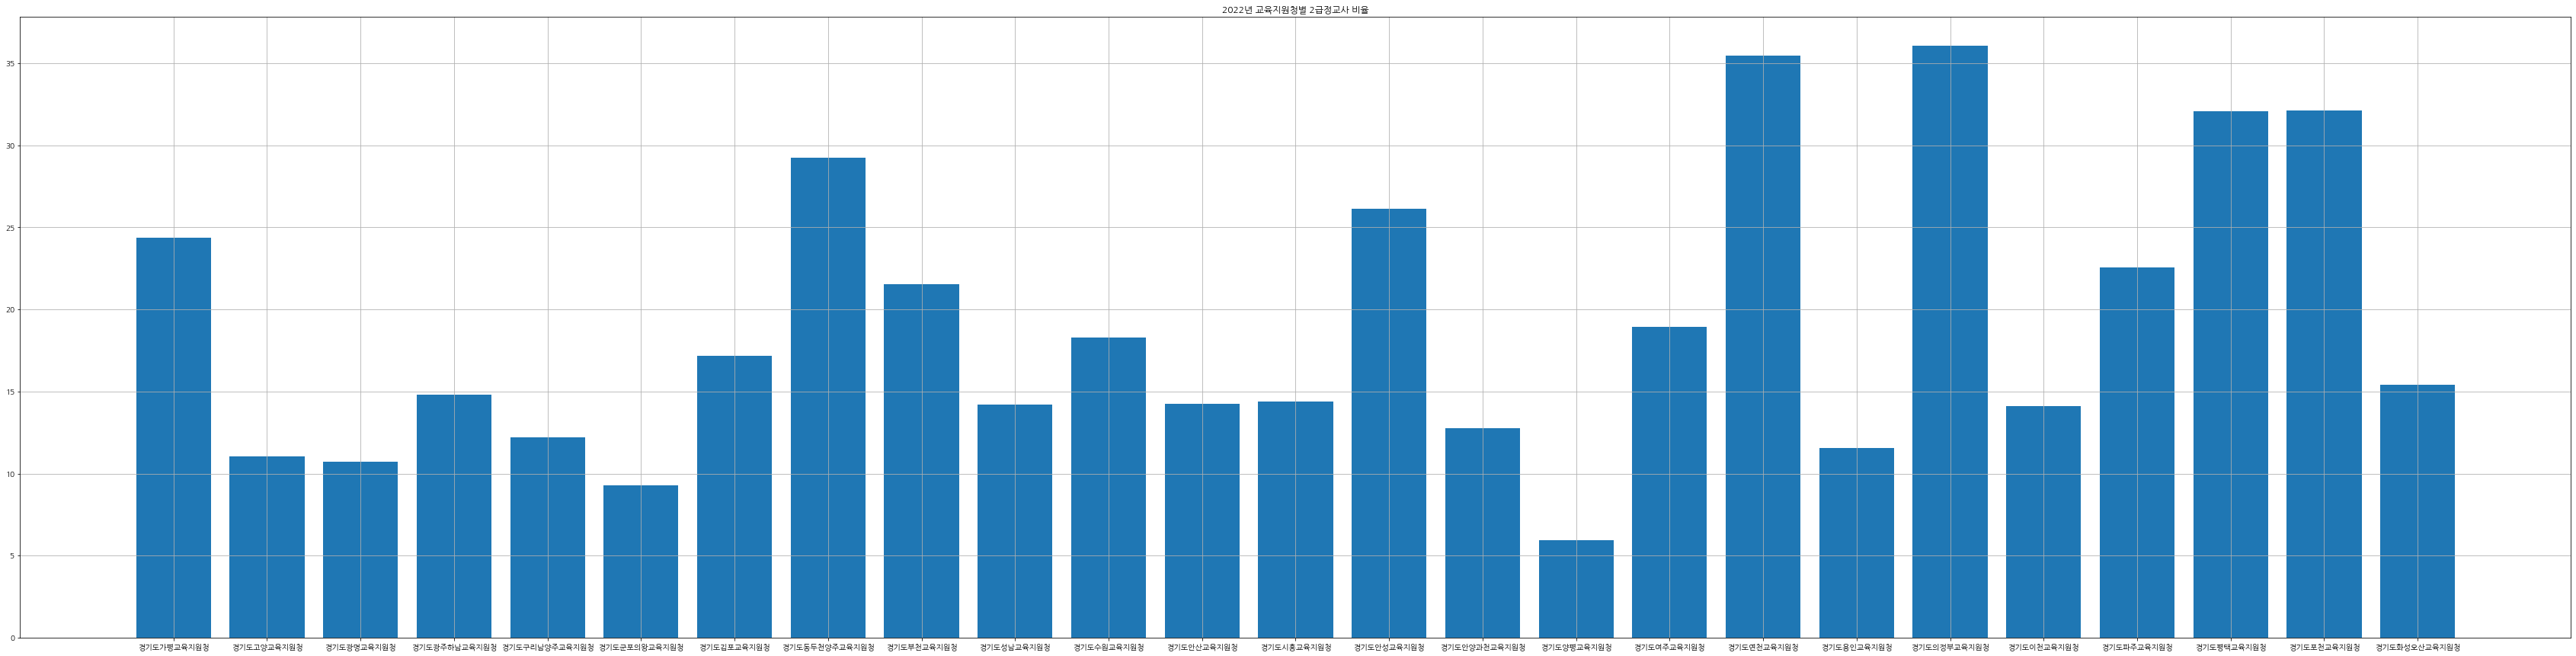

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(60,15))
plt.bar(local, propotion)
plt.title('2022년 교육지원청별 2급정교사 비율')
plt.grid(True)
plt.show()